In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(style = 'ggplot')
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
train = pd.read_csv('G:/ml/Bike_share/train.csv')
test = pd.read_csv('G:/ml/Bike_share/test.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
nulls = pd.DataFrame(test.isnull().sum().sort_values(ascending =False)[:25])
nulls.columns = ['Null count']
nulls.index.name = 'Feature'
nulls

,Null count
Feature,
windspeed,0
humidity,0
atemp,0
temp,0
weather,0
workingday,0
holiday,0
season,0
datetime,0


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


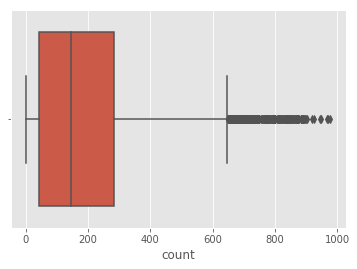

In [8]:
sns.boxplot(train['count'])

In [9]:
train = train[train['count']<600]

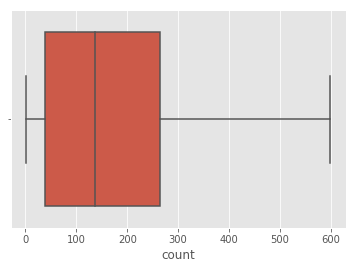

In [10]:
sns.boxplot(train['count'])

0.8534138071928231


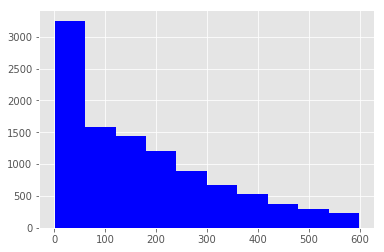

In [11]:
print(train['count'].skew())
plt.hist(train['count'],color ='blue')
plt.show()

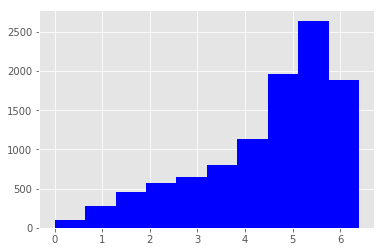

-1.007524121858456


In [12]:
target=np.log(train['count'])
plt.hist(target, color ='blue')
plt.show()
print(target.skew())

In [13]:
train['date'] =train.datetime.apply(lambda x: x.split()[0])
train['hour'] =train.datetime.apply(lambda x: x.split()[1].split(':')[0])
train['weekday'] = train.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').weekday())
train['month'] = train.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').month)
train = train.drop('datetime',axis=1)

In [14]:
train.shape

(10472, 15)

In [15]:
train.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
date           object
hour           object
weekday         int64
month           int64
dtype: object

In [16]:
numeric =['temp','atemp','casual','registered','humidity','windspeed','count']
train = train[['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','count','date','hour','weekday','month']]

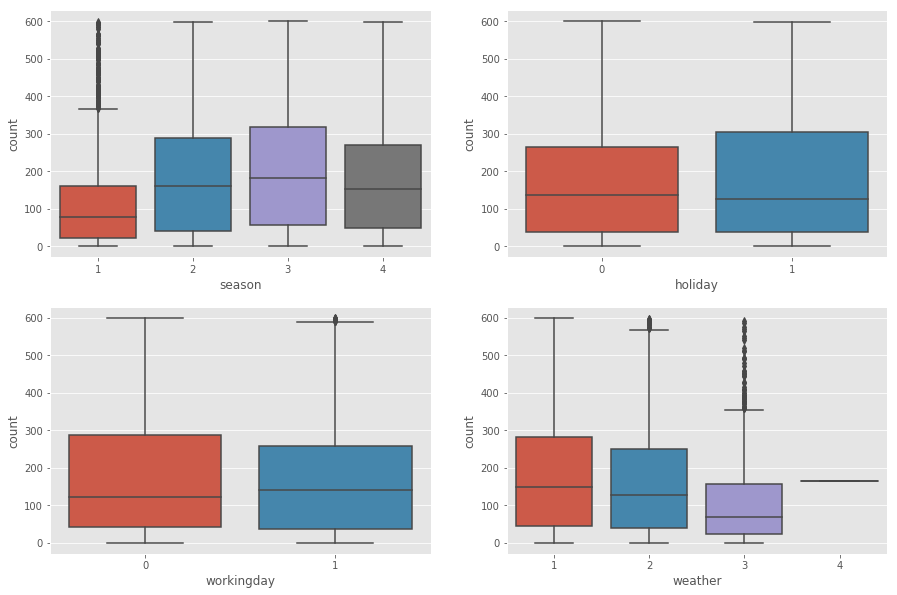

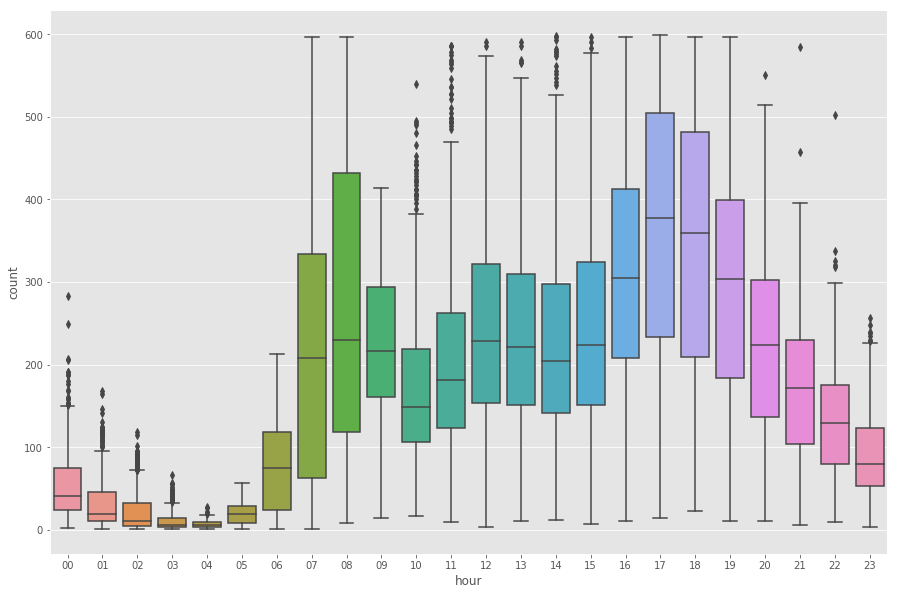

In [17]:
fig,axes = plt.subplots(ncols=2 ,nrows=2)
fig.set_size_inches(15,10)
sns.boxplot(data=train,x='season',y='count',ax=axes[0][0])
sns.boxplot(data=train,x='holiday',y='count',ax=axes[0][1])
sns.boxplot(data=train,x='workingday',y='count',ax=axes[1][0])
sns.boxplot(data=train,x='weather',y='count',ax=axes[1][1])

fig1,axes1 = plt.subplots()
fig1.set_size_inches(15,10)
sns.boxplot(data=train,x='hour',y='count')

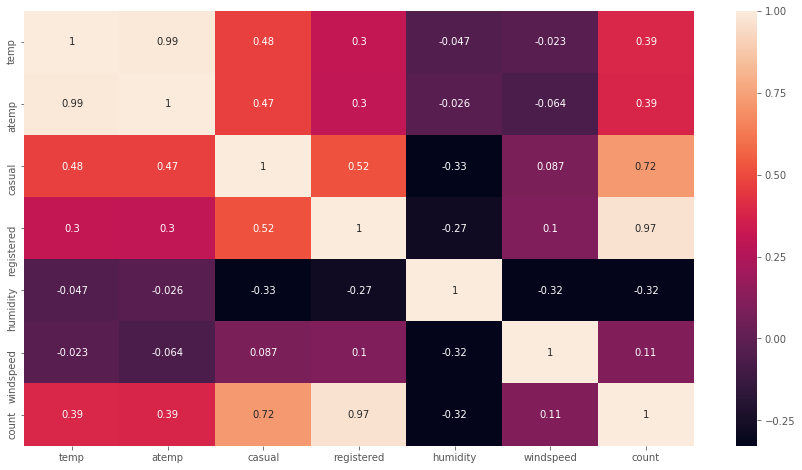

In [18]:
plt.subplots(figsize=(15,8))
sns.heatmap(train[numeric].corr(),annot=True)

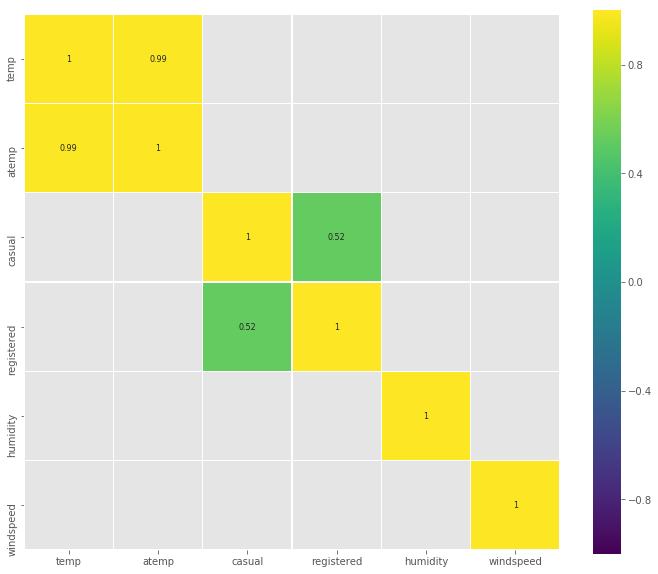

In [19]:
corr = train[numeric].drop('count', axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

[Text(0.5,1,u'Month Vs Count')]

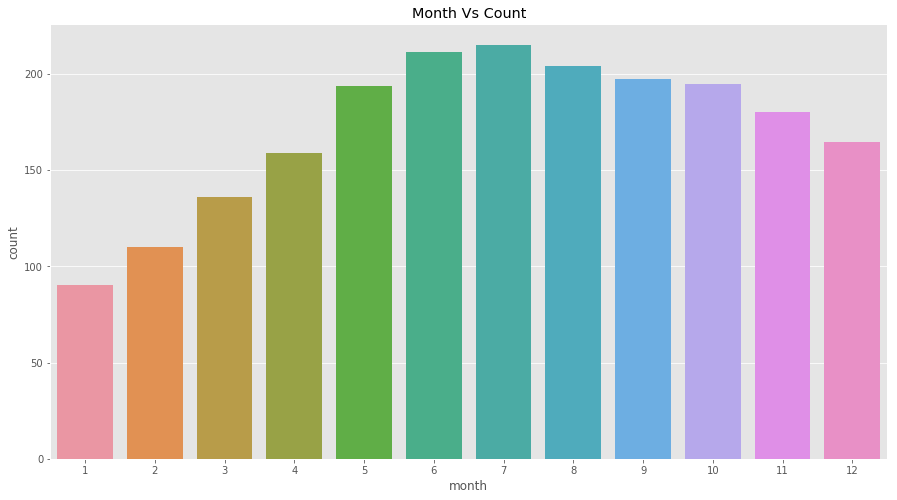

In [20]:
plt.figure(figsize=(15,8))
monthagg = pd.DataFrame(train.groupby('month')['count'].mean()).reset_index()
sns.barplot(data=monthagg, x='month',y='count').set(title = 'Month Vs Count')

[Text(0.5,1,u'Hour,Season Vs Count')]

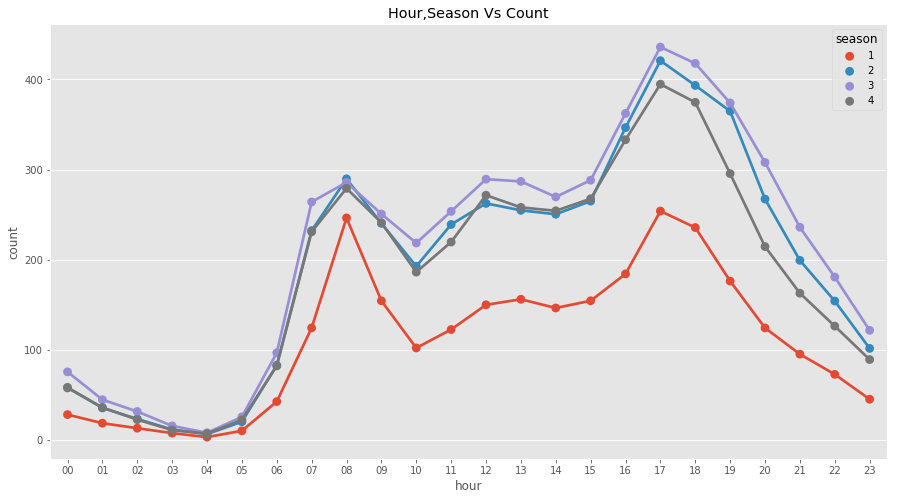

In [21]:
plt.figure(figsize=(15,8))
houragg = pd.DataFrame(train.groupby(['hour','season'])['count'].mean()).reset_index()
sns.pointplot(data=houragg,x=houragg['hour'],y=houragg['count'],hue=houragg['season']).set(title='Hour,Season Vs Count')

[Text(0.5,1,u'Hour,Week Vs Count')]

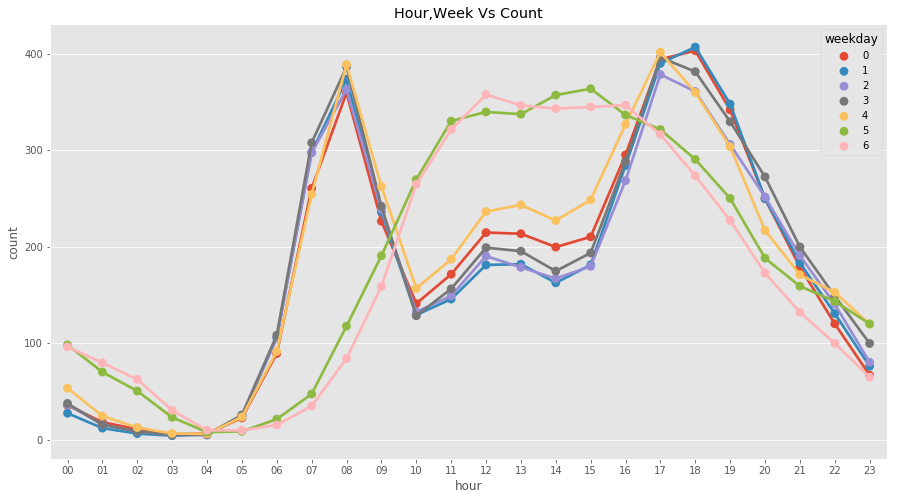

In [22]:
plt.figure(figsize=(15,8))
hourweekagg = pd.DataFrame(train.groupby(['hour','weekday'])['count'].mean()).reset_index()
sns.pointplot(data=hourweekagg,x=hourweekagg['hour'],y=hourweekagg['count'],hue=hourweekagg['weekday']).set(title='Hour,Week Vs Count')

In [23]:
y = np.log(train['count'])
train = train.drop('count',axis=1)
train = train.drop('atemp',axis=1)
train = train.drop('date',axis=1)
train = train.drop('casual',axis=1)
train = train.drop('registered',axis=1)
m_dum = pd.get_dummies(train['month'],prefix='m')
ho_dum = pd.get_dummies(train['hour'],prefix='ho')
s_dum = pd.get_dummies(train['season'],prefix='s')
we_dum = pd.get_dummies(train['weather'],prefix='we')
X =pd.concat([train,s_dum,we_dum,m_dum,ho_dum],axis =1)

In [24]:

testid = test['datetime']
test['date']  = test.datetime.apply(lambda x: x.split()[0])
test['hour'] = test.datetime.apply(lambda x: x.split()[1].split(':')[0])
test['weekday'] = test.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').weekday())
test['month'] = test.date.apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').month)
test = test.drop('datetime',axis=1)
test = test.drop('atemp',axis=1)
test = test.drop('date',axis=1)
s_dum = pd.get_dummies(test['season'],prefix='s')
we_dum = pd.get_dummies(test['weather'],prefix='we')
m_dum = pd.get_dummies(test['month'],prefix='m')
ho_dum = pd.get_dummies(test['hour'],prefix='ho')
test= pd.concat([test,s_dum,we_dum,m_dum,ho_dum],axis=1)


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state =42,test_size=0.33)

In [26]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
clf =  GradientBoostingRegressor(n_estimators=200)
clf.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [27]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9155470661847918
0.9004245053539999


In [28]:
pred=clf.predict(test)
final_pred = np.exp(pred)


In [29]:
output4 = pd.DataFrame()
output4['datetime'] = testid
output4['count'] = pred
output4.to_csv('G:/ml/Bike_share/output4.csv',index=False)